In [54]:
import os.path
from os import path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



def  split(ratio, all_docs, all_labels):
    split_point = int(ratio*len(all_docs))
    
    #train data and labels
    train_docs = all_docs[:split_point]
    train_labels = all_labels[:split_point]
    
    #eval data and labels
    eval_docs = all_docs[split_point:]
    eval_labels = all_labels[split_point:]
    return train_docs, train_labels, eval_docs, eval_labels
        
def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file,encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels


def train_nb(documents, labels, smoothing):
    
    #check relevance
    label_encoder = preprocessing.LabelEncoder()
    encoded_values = label_encoder.fit_transform(train_labels)
    
    global count_vect
    count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
    train_counts = count_vect.fit_transform(documents)
    
    #Finding Term Frequency times Inverse Document Frequency
    global tfidf_transformer
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(train_counts)
   
    
    return MultinomialNB(alpha=smoothing).fit(train_tfidf, train_labels)


def classify_nb(document, clf):
   
    counts = count_vect.transform(document)
    tfidf = tfidf_transformer.transform(counts)
    return clf.predict(tfidf)

all_docs, all_labels = read_documents('all_sentiment_shuffled.txt')

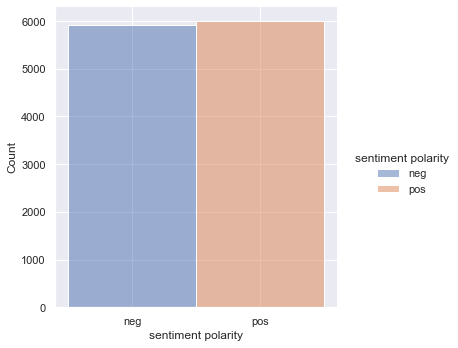

In [55]:
#Task1 Plot Distribution
data = pd.DataFrame(np.array(all_labels),  columns=["sentiment polarity"])
sns.displot(data = data, x="sentiment polarity", hue="sentiment polarity")
sns.set(style="darkgrid", color_codes=True)
plt.show()

#Splitting Data into training and evaluation
train_docs, train_labels, eval_docs, eval_labels = split(0.80,all_docs, all_labels)

#classifier
clf = train_nb(train_docs, train_labels, 1)

# #test
# docs_new = [['this', 'was', 'amazing'], ['this', 'was', 'terrible']]
# predicted = classify_nb(docs_new, clf)
# for x in predicted:
#     print(x)



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# #Task2 A: Naive Bayes Classifier

# #Naive Bayes Classifier with 0.75 smoothing
# clf1 = train_nb(train_docs, train_labels, 0.75)
# predictions1 = classify_nb(eval_docs,clf1)
# print("\n**Naive Bayes Classifier (with 0.75 smoothing)**\n")
# print("\n"+classification_report(eval_labels, predictions1, target_names=list(dict.fromkeys(all_labels))))
# counts = count_vect.transform(eval_docs)
# eval_tfidf = tfidf_transformer.transform(counts)
# plot_confusion_matrix(clf1, eval_tfidf , eval_labels)
# plt.title("Naive Bayes Classifier Confusion Matrix")
# plt.show()


# #Task2 B: Base-DT
# from sklearn.tree import DecisionTreeClassifier
# clf2 = DecisionTreeClassifier(criterion='entropy')

# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# freqs1 = vectorizer.fit_transform(train_docs)
# train_tfidf = tfidf_transformer.fit_transform(freqs1)
# clf2.fit(train_tfidf, train_labels)
# freqs2 = vectorizer.transform(eval_docs)
# eval_tfidf = tfidf_transformer.fit_transform(freqs2)
# predictions2 = clf2.predict(eval_tfidf)
# print("\n**Base-DT**\n")
# print("\n"+classification_report(eval_labels, predictions2, target_names=list(dict.fromkeys(all_labels))))
# plot_confusion_matrix(clf2, eval_tfidf , eval_labels) 
# plt.title("Base-DT Confusion Matrix")
# plt.show()



vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
freqs1 = vectorizer.fit_transform(train_docs)
train_tfidf = tfidf_transformer.fit_transform(freqs1)
parameters =  {'criterion':['gini','entropy'],'max_depth':list(range(1,20)), 'max_leaf_nodes': list(range(2, 100))}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, verbose=10, cv=3)
clf.fit(train_tfidf,train_labels)
clf.best_estimator_



# #Task2 C: Best-DT
# from sklearn.tree import DecisionTreeClassifier
# clf3 = DecisionTreeClassifier(criterion="gini",max_depth=9, max_leaf_nodes=65)

# vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# freqs1 = vectorizer.fit_transform(train_docs)
# train_tfidf = tfidf_transformer.fit_transform(freqs1)
# clf3.fit(train_tfidf, train_labels)
# freqs2 = vectorizer.transform(eval_docs)
# eval_tfidf = tfidf_transformer.fit_transform(freqs2)
# predictions3 = clf3.predict(eval_tfidf)
# print("\n**Best-DT**\n")
# print("\n"+classification_report(eval_labels, predictions3, target_names=list(dict.fromkeys(all_labels))))
# plot_confusion_matrix(clf3, eval_tfidf , eval_labels) 
# plt.title("Best-DT Confusion Matrix")
# plt.show()




Fitting 3 folds for each of 3724 candidates, totalling 11172 fits
[CV] criterion=gini, max_depth=1, max_leaf_nodes=2 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=2, score=0.595, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=2 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=2, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=2 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=2, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=3 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=3, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=3 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=3, score=0.603, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=3 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=3, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=4 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=4, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=4 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=4, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=4 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=4, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=6, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=6, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=6, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=7 ...................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=7, score=0.595, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=1, max_leaf_nodes=23, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=23 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=23, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=23 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=23, score=0.609, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=24, score=0.595, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=24, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=24, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=25 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=25, score=0.595, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=1, max_leaf_nodes=41, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=41 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=41, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=41 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=41, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=42, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=42, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=42, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=43 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=43, score=0.595, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=1, max_leaf_nodes=59, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=59 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=59, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=59 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=59, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=60, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=60, score=0.603, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=60, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=61 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=61, score=0.595, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=1, max_leaf_nodes=77, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=77 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=77, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=77 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=77, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=78, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=78, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=78, score=0.609, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=79 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=79, score=0.595, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=1, max_leaf_nodes=95, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=95 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=95, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=95 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=95, score=0.609, total=   0.3s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=96, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=96, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=96, score=0.609, total=   0.3s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=97 ..................
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=97, score=0.595, total=   0.4s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=15, score=0.637, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=15 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=15, score=0.617, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=16, score=0.611, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=16, score=0.637, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=16, score=0.617, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=17 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=17, score=0.611, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=17 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=17, score=0.637, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=33, score=0.637, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=33 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=33, score=0.617, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=34, score=0.611, total=   0.8s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=34, score=0.637, total=   0.8s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=34, score=0.617, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=35 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=35, score=0.611, total=   0.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=35 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=35, score=0.637, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=51, score=0.637, total=   0.9s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=51 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=51, score=0.617, total=   0.9s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=52, score=0.611, total=   0.9s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=52, score=0.637, total=   1.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=52, score=0.617, total=   1.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=53 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=53, score=0.611, total=   1.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=53 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=53, score=0.637, total=   1.0s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=69, score=0.637, total=   1.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=69 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=69, score=0.617, total=   0.9s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=70, score=0.611, total=   1.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=70, score=0.637, total=   2.9s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=70, score=0.617, total=   2.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=71 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=71, score=0.611, total=   1.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=71 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=71, score=0.637, total=   1.7s
[CV] cr

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=87, score=0.637, total=   1.6s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=87 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=87, score=0.617, total=   1.6s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=88, score=0.611, total=   1.6s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=88, score=0.637, total=   1.7s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=88, score=0.617, total=   1.8s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=89 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=89, score=0.611, total=   1.6s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=89 ..................
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=89, score=0.637, total=   1.6s
[CV] cr

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=7, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=8, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=8, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=8 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=8, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=9, score=0.646, total=   2.6s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=9, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=9 ...................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=9, score=0.646, total=   2.5s
[CV] criterion

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=25, score=0.646, total=   4.2s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=26 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=26, score=0.646, total=   4.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=26 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=26, score=0.661, total=   4.1s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=26 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=26, score=0.646, total=   2.9s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=27 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=27, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=27 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=27, score=0.661, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=27 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=27, score=0.646, total=   2.3s
[CV] cr

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=43, score=0.646, total=   2.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=44 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=44, score=0.646, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=44 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=44, score=0.661, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=44 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=44, score=0.646, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=45 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=45, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=45 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=45, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=45 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=45, score=0.646, total=   2.4s
[CV] cr

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=61, score=0.646, total=   2.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=62 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=62, score=0.646, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=62 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=62, score=0.661, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=62 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=62, score=0.646, total=   2.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=63 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=63, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=63 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=63, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=63 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=63, score=0.646, total=   2.3s
[CV] cr

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=79, score=0.646, total=   2.7s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=80 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=80, score=0.646, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=80 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=80, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=80 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=80, score=0.646, total=   2.3s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=81 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=81, score=0.646, total=   2.7s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=81 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=81, score=0.661, total=   2.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=81 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=81, score=0.646, total=   2.4s
[CV] cr

[CV]  criterion=gini, max_depth=3, max_leaf_nodes=97, score=0.646, total=   2.8s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=98 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=98, score=0.646, total=   3.4s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=98 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=98, score=0.661, total=   2.6s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=98 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=98, score=0.646, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=99 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=99, score=0.646, total=   2.5s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=99 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=99, score=0.661, total=   2.9s
[CV] criterion=gini, max_depth=3, max_leaf_nodes=99 ..................
[CV]  criterion=gini, max_depth=3, max_leaf_nodes=99, score=0.646, total=   2.4s
[CV] cr

[CV]  criterion=gini, max_depth=4, max_leaf_nodes=18, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=18 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=18, score=0.664, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=18 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=18, score=0.653, total=   3.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=19 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=19, score=0.653, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=19 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=19, score=0.664, total=   3.6s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=19 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=19, score=0.653, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=20 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=20, score=0.653, total=   3.3s
[CV] cr

[CV]  criterion=gini, max_depth=4, max_leaf_nodes=36, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=36 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=36, score=0.664, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=36 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=36, score=0.653, total=   4.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=37 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=37, score=0.653, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=37 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=37, score=0.664, total=   3.5s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=37 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=37, score=0.653, total=   3.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=38 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=38, score=0.653, total=   3.3s
[CV] cr

[CV]  criterion=gini, max_depth=4, max_leaf_nodes=54, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=54 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=54, score=0.664, total=   3.5s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=54 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=54, score=0.653, total=   3.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=55 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=55, score=0.653, total=   4.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=55 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=55, score=0.664, total=   5.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=55 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=55, score=0.653, total=   3.5s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=56 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=56, score=0.653, total=   3.4s
[CV] cr

[CV]  criterion=gini, max_depth=4, max_leaf_nodes=72, score=0.653, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=72 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=72, score=0.664, total=   4.9s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=72 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=72, score=0.653, total=   3.7s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=73 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=73, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=73 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=73, score=0.664, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=73 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=73, score=0.653, total=   3.2s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=74 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=74, score=0.653, total=   3.5s
[CV] cr

[CV]  criterion=gini, max_depth=4, max_leaf_nodes=90, score=0.653, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=90 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=90, score=0.664, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=90 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=90, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=91 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=91, score=0.653, total=   3.4s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=91 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=91, score=0.664, total=   3.3s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=91 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=91, score=0.653, total=   4.0s
[CV] criterion=gini, max_depth=4, max_leaf_nodes=92 ..................
[CV]  criterion=gini, max_depth=4, max_leaf_nodes=92, score=0.653, total=   5.5s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, score=0.663, total=   3.8s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, score=0.648, total=   3.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=11, score=0.653, total=   3.9s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=11, score=0.664, total=   4.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=11 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=11, score=0.651, total=   3.8s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=12 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=12, score=0.657, total=   4.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=12 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=12, score=0.664, total=   4.4s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=28, score=0.665, total=   7.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=28 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=28, score=0.649, total=   6.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=29 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=29, score=0.654, total=   5.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=29 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=29, score=0.665, total=   5.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=29 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=29, score=0.649, total=   7.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=30 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=30, score=0.654, total=   7.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=30 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=30, score=0.665, total=   7.7s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=46, score=0.665, total=   5.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=46 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=46, score=0.649, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=47 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=47, score=0.654, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=47 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=47, score=0.665, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=47 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=47, score=0.649, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=48 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=48, score=0.654, total=   4.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=48 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=48, score=0.665, total=   4.4s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=64, score=0.665, total=   6.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=64 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=64, score=0.649, total=   4.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=65 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=65, score=0.654, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=65 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=65, score=0.665, total=   4.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=65 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=65, score=0.649, total=   7.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=66 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=66, score=0.654, total=   7.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=66 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=66, score=0.665, total=   5.2s
[CV] cr

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=82, score=0.665, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=82 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=82, score=0.649, total=   4.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=83 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=83, score=0.654, total=   4.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=83 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=83, score=0.665, total=   4.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=83 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=83, score=0.649, total=   4.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=84 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=84, score=0.654, total=   4.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=84 ..................
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=84, score=0.665, total=   4.6s
[CV] cr

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=2, score=0.603, total=   1.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=2 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=2, score=0.609, total=   1.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=3, score=0.595, total=   2.1s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=3, score=0.625, total=   3.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=3 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=3, score=0.609, total=   3.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=4, score=0.623, total=   4.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=4 ...................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=4, score=0.637, total=   4.3s
[CV] criterion

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=20, score=0.662, total=   8.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=21 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=21, score=0.662, total=   8.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=21 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=21, score=0.673, total=   9.5s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=21 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=21, score=0.664, total=   9.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=22 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=22, score=0.662, total=   9.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=22 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=22, score=0.672, total=   9.1s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=22 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=22, score=0.664, total=   7.3s
[CV] cr

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=38, score=0.664, total=  10.9s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=39 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=39, score=0.660, total=   6.1s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=39 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=39, score=0.671, total=   6.5s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=39 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=39, score=0.664, total=   5.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=40 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=40, score=0.660, total=   5.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=40 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=40, score=0.671, total=   5.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=40 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=40, score=0.664, total=   5.2s
[CV] cr

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=56, score=0.663, total=   9.7s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=57 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=57, score=0.661, total=   9.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=57 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=57, score=0.671, total=   7.7s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=57 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=57, score=0.663, total=   4.9s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=58 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=58, score=0.661, total=   5.9s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=58 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=58, score=0.671, total=  10.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=58 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=58, score=0.663, total=   9.5s
[CV] cr

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=74, score=0.663, total=   5.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=75 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=75, score=0.661, total=   5.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=75 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=75, score=0.671, total=   5.0s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=75 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=75, score=0.663, total=   5.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=76 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=76, score=0.661, total=   6.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=76 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=76, score=0.671, total=   6.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=76 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=76, score=0.663, total=   7.7s
[CV] cr

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=92, score=0.663, total=   6.0s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=93 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=93, score=0.661, total=   6.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=93 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=93, score=0.671, total=   6.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=93 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=93, score=0.663, total=   6.0s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=94 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=94, score=0.661, total=   6.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=94 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=94, score=0.671, total=   6.5s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=94 ..................
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=94, score=0.663, total=   5.8s
[CV] cr

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=13, score=0.658, total=   5.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=13 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=13, score=0.673, total=   5.7s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=13 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=13, score=0.657, total=   5.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=14 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=14, score=0.660, total=   5.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=14 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=14, score=0.673, total=   5.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=14 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=14, score=0.654, total=   5.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=15 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=15, score=0.664, total=   5.4s
[CV] cr

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=31, score=0.666, total=   6.9s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=31 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=31, score=0.676, total=   7.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=31 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=31, score=0.670, total=   6.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=32 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=32, score=0.667, total=   6.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=32 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=32, score=0.676, total=   7.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=32 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=32, score=0.670, total=   6.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=33 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=33, score=0.667, total=   8.2s
[CV] cr

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=49, score=0.665, total=   7.0s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=49 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=49, score=0.675, total=   7.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=49 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=49, score=0.671, total=   6.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=50 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=50, score=0.665, total=   7.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=50 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=50, score=0.675, total=   7.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=50 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=50, score=0.671, total=   7.0s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=51 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=51, score=0.665, total=   7.7s
[CV] cr

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=67, score=0.666, total=   7.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=67 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=67, score=0.674, total=   7.7s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=67 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=67, score=0.666, total=   7.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=68 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=68, score=0.666, total=   7.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=68 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=68, score=0.674, total=   7.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=68 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=68, score=0.666, total=   7.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=69 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=69, score=0.666, total=   8.0s
[CV] cr

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=85, score=0.666, total=   7.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=85 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=85, score=0.674, total=   7.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=85 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=85, score=0.666, total=   8.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=86 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=86, score=0.666, total=   9.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=86 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=86, score=0.674, total=  10.7s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=86 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=86, score=0.666, total=   8.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=87 ..................
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=87, score=0.666, total=   7.5s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, score=0.639, total=   3.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, score=0.644, total=   3.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, score=0.642, total=   3.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, score=0.646, total=   3.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, score=0.654, total=   3.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, score=0.644, total=   3.7s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=7 ...................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=7, score=0.651, total=   3.9s
[CV] criterion

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=23, score=0.666, total=   7.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=23 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=23, score=0.679, total=   7.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=23 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=23, score=0.664, total=   6.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=24, score=0.668, total=   7.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=24, score=0.679, total=   7.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=24 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=24, score=0.665, total=   6.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=25 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=25, score=0.668, total=   7.2s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=41, score=0.672, total=   7.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=41 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=41, score=0.680, total=   8.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=41 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=41, score=0.676, total=   7.9s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=42, score=0.672, total=   8.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=42, score=0.680, total=   8.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=42 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=42, score=0.676, total=   8.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=43 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=43, score=0.672, total=   8.2s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=59, score=0.674, total=   8.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=59 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=59, score=0.676, total=  10.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=59 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=59, score=0.677, total=   8.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=60, score=0.674, total=   8.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=60, score=0.676, total=   8.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=60 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=60, score=0.677, total=   8.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=61 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=61, score=0.673, total=   8.8s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=77, score=0.672, total=   9.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=77 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=77, score=0.675, total=  11.0s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=77 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=77, score=0.671, total=   9.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=78, score=0.672, total=   8.9s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=78, score=0.675, total=   9.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=78 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=78, score=0.671, total=  10.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=79 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=79, score=0.672, total=  10.7s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=95, score=0.672, total=   8.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=95 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=95, score=0.676, total=   9.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=95 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=95, score=0.671, total=   8.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=96, score=0.672, total=   9.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=96, score=0.676, total=   8.9s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=96 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=96, score=0.671, total=   9.0s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=97 ..................
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=97, score=0.672, total=   8.8s
[CV] cr

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=15, score=0.673, total=   6.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=15 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=15, score=0.656, total=   5.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=16, score=0.660, total=   6.0s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=16, score=0.674, total=   6.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=16 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=16, score=0.659, total=   5.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=17 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=17, score=0.664, total=   6.5s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=17 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=17, score=0.674, total=   6.4s
[CV] cr

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=33, score=0.680, total=   8.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=33 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=33, score=0.675, total=   8.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=34, score=0.670, total=   8.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=34, score=0.681, total=   8.8s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=34 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=34, score=0.675, total=  10.0s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=35 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=35, score=0.670, total=   8.7s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=35 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=35, score=0.681, total=   8.6s
[CV] cr

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=51, score=0.681, total=   9.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=51 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=51, score=0.681, total=   9.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=52, score=0.675, total=   9.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=52, score=0.681, total=   9.8s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=52 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=52, score=0.682, total=   9.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=53 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=53, score=0.675, total=   9.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=53 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=53, score=0.681, total=   9.7s
[CV] cr

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=69, score=0.675, total=  10.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=69 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=69, score=0.681, total=   9.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=70, score=0.675, total=  10.5s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=70, score=0.675, total=   9.8s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=70 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=70, score=0.681, total=   9.5s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=71 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=71, score=0.675, total=  11.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=71 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=71, score=0.675, total=  10.0s
[CV] cr

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=87, score=0.674, total=  10.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=87 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=87, score=0.677, total=   9.9s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=88, score=0.672, total=  10.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=88, score=0.674, total=  10.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=88 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=88, score=0.678, total=   9.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=89 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=89, score=0.673, total=  10.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=89 ..................
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=89, score=0.674, total=  10.1s
[CV] cr

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=7, score=0.654, total=   3.7s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=7 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=7, score=0.641, total=   3.7s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=8, score=0.651, total=   4.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=8, score=0.660, total=   3.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=8 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=8, score=0.645, total=   3.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=9, score=0.651, total=   4.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=9 ..................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=9, score=0.660, total=   4.3s
[CV] cr

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=25, score=0.682, total=   8.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=25 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=25, score=0.670, total=   7.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=26 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=26, score=0.666, total=   7.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=26 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=26, score=0.682, total=   7.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=26 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=26, score=0.670, total=   7.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=27 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=27, score=0.664, total=   7.3s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=27 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=27, score=0.683, total=   8.1s


[CV]  criterion=gini, max_depth=10, max_leaf_nodes=43, score=0.684, total=   9.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=43 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=43, score=0.682, total=   8.6s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=44 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=44, score=0.669, total=   9.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=44 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=44, score=0.684, total=   9.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=44 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=44, score=0.685, total=   8.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=45 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=45, score=0.669, total=   9.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=45 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=45, score=0.684, total=   9.1s


[CV]  criterion=gini, max_depth=10, max_leaf_nodes=61, score=0.685, total=  10.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=61 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=61, score=0.686, total=   9.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=62 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=62, score=0.670, total=  10.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=62 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=62, score=0.685, total=   9.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=62 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=62, score=0.686, total=   9.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=63 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=63, score=0.669, total=   9.6s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=63 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=63, score=0.685, total=   9.8s


[CV]  criterion=gini, max_depth=10, max_leaf_nodes=79, score=0.678, total=  10.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=79 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=79, score=0.685, total=   9.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=80 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=80, score=0.668, total=  10.4s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=80 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=80, score=0.679, total=  10.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=80 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=80, score=0.685, total=  10.6s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=81 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=81, score=0.668, total=  10.5s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=81 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=81, score=0.679, total=  10.4s


[CV]  criterion=gini, max_depth=10, max_leaf_nodes=97, score=0.681, total=  10.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=97 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=97, score=0.680, total=  10.7s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=98 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=98, score=0.665, total=  10.6s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=98 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=98, score=0.681, total=  11.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=98 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=98, score=0.680, total=  10.7s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=99 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=99, score=0.665, total=  10.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=99 .................
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=99, score=0.681, total=  11.3s


[CV]  criterion=gini, max_depth=11, max_leaf_nodes=17, score=0.674, total=   6.6s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=17 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=17, score=0.662, total=   6.5s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=18 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=18, score=0.667, total=   6.6s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=18 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=18, score=0.675, total=   7.1s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=18 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=18, score=0.664, total=   6.7s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=19 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=19, score=0.667, total=   7.8s
[CV] criterion=gini, max_depth=11, max_leaf_nodes=19 .................
[CV]  criterion=gini, max_depth=11, max_leaf_nodes=19, score=0.675, total=   8.1s


In [ ]:
#Task 3: Output files 




#Output file for Naive Bayes Model
split_point = int(0.80*len(all_docs))

with open('Naive Bayes Classifier-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions1, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Naive Bayes Classifier (with 0.75 smoothing)**\n")
        f.write("\n"+classification_report(eval_labels, predictions1, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions1), separator=', '))
        

#Output file for Base-DT Model
split_point = int(0.80*len(all_docs))

with open('Base DT-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions2, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Base-DT**\n")
        f.write("\n"+classification_report(eval_labels, predictions2, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions2), separator=', '))
        
        
#Output file for Best-DT Model
split_point = int(0.80*len(all_docs))

with open('Best DT-all_sentiment_shuffled.txt', 'w') as f:
        f.write(f'ROW,\tPREDICTION,\tTARGET\n')
        for x,y in zip(predictions3, eval_labels):
            f.write(f'{split_point}\t{x}\t\t{y}\n')
            split_point+=1
            
        
        f.write("\n**Best-DT**\n")
        f.write("\n"+classification_report(eval_labels, predictions3, target_names=list(dict.fromkeys(all_labels))))
        f.write("\nConfusion Matrix\n\n"+np.array2string(confusion_matrix(eval_labels , predictions3), separator=', '))
    
        
    
